In [2]:
# importing necessary libraries to implement models like linear regression,arima,moving average, lstm
!pip install yfinance pandas numpy matplotlib scikit-learn statsmodels

!pip install pmdarima
# we are using yahoo financ api for data, required for developing models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.5 MB/s eta 0:00:00


**import required modules**

In [3]:
# importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

**Fetch Historical Stock Data**

In [4]:
# Define the stock ticker and time range
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2025-01-01"

# Fetch historical stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Display first few rows
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320435  24.789804  23.879983  24.778681  212818400
2015-01-05  23.635283  24.169162  23.448426  24.089080  257142000
2015-01-06  23.637506  23.897772  23.274912  23.699792  263188400
2015-01-07  23.968962  24.069063  23.735389  23.846614  160423600
2015-01-08  24.889902  24.947740  24.180287  24.298187  237458000


**Data Preprocessing**

Price  Ticker
Close  AAPL      0
dtype: int64


<ipython-input-5-95256f9b83d1>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


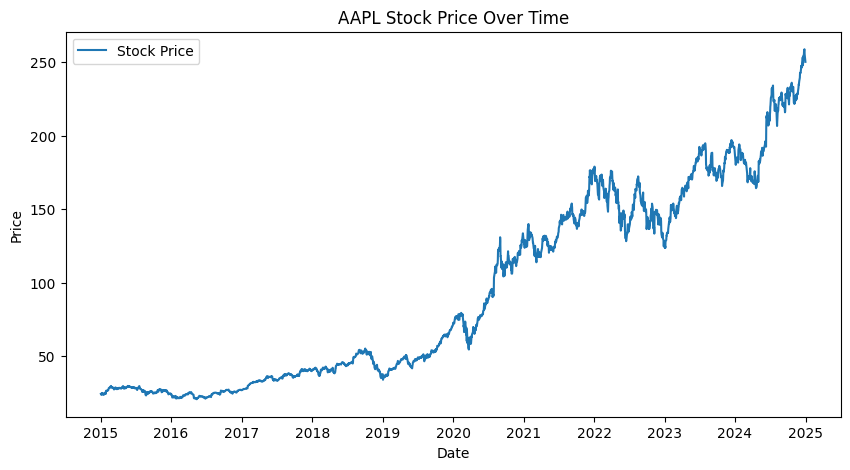

In [5]:
df = data[['Close']].copy()

# Convert index to datetime format
df.index = pd.to_datetime(df.index)

# Check for missing values
print(df.isnull().sum())

# Fill missing values if any
df.fillna(method='ffill', inplace=True)

# Visualize the stock price
plt.figure(figsize=(10, 5))
plt.plot(df, label="Stock Price")
plt.title(f"{ticker} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


**Model-Specific Data Processing**

**Moving Average Model**

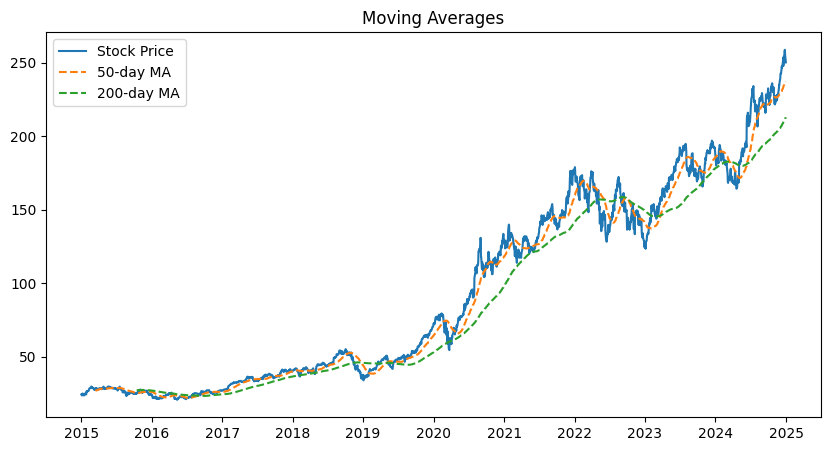

In [6]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label="Stock Price")
plt.plot(df['MA50'], label="50-day MA", linestyle="dashed")
plt.plot(df['MA200'], label="200-day MA", linestyle="dashed")
plt.title("Moving Averages")
plt.legend()
plt.show()


**ARIMA Model**

In [17]:
result = adfuller(df['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")  # p-value < 0.05 means stationary

#If not stationary, apply differencing:
df['Close_diff'] = df['Close'].diff().dropna()

ADF Statistic: 0.7973439062352732
p-value: 0.9915931724982728


**Train ARIMA Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


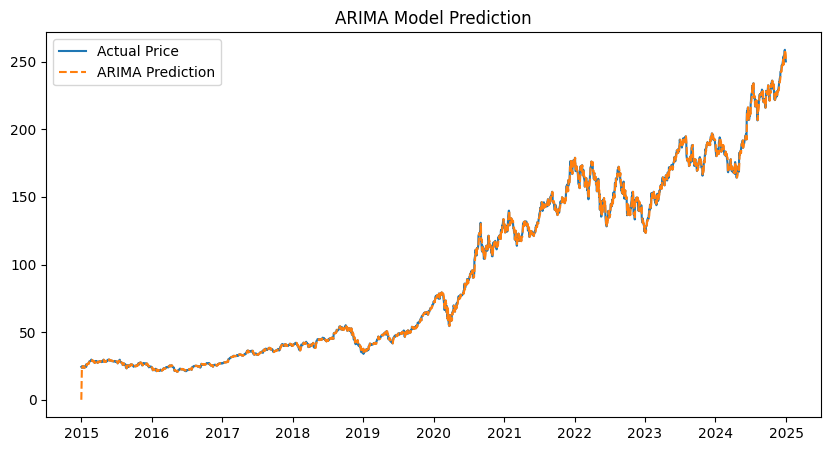

In [18]:
# Define ARIMA (p, d, q)
p, d, q = 5, 1, 0  # Adjust based on ACF/PACF plots

# Fit ARIMA model
arima_model = ARIMA(df['Close'], order=(p, d, q))
arima_result = arima_model.fit()

# Predict future values
df['ARIMA_Pred'] = arima_result.fittedvalues

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label="Actual Price")
plt.plot(df['ARIMA_Pred'], label="ARIMA Prediction", linestyle="dashed")
plt.title("ARIMA Model Prediction")
plt.legend()
plt.show()


**Linear Regression**

Linear Regression uses past prices to predict future prices.

Prepare Data for Regression

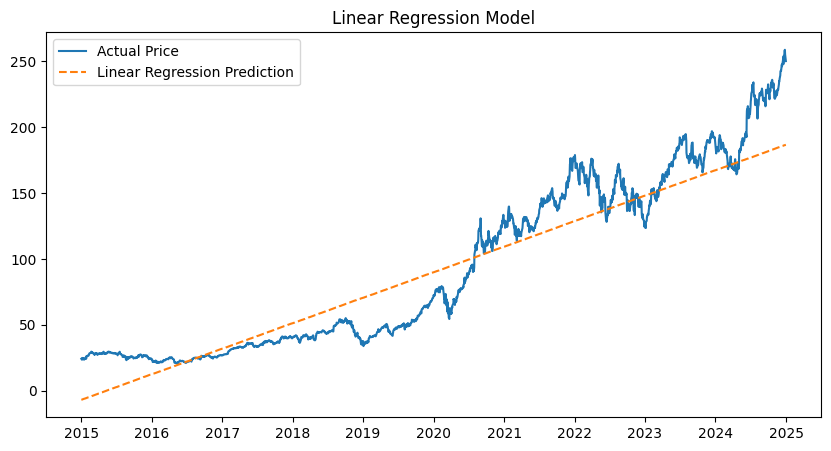

In [19]:
df['Days'] = np.arange(len(df))  # Convert dates into numerical values
X = df[['Days']]
y = df['Close']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict future values
df['Linear_Pred'] = lr.predict(X)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label="Actual Price")
plt.plot(df['Linear_Pred'], label="Linear Regression Prediction", linestyle="dashed")
plt.title("Linear Regression Model")
plt.legend()
plt.show()


**Polynomial Regression **

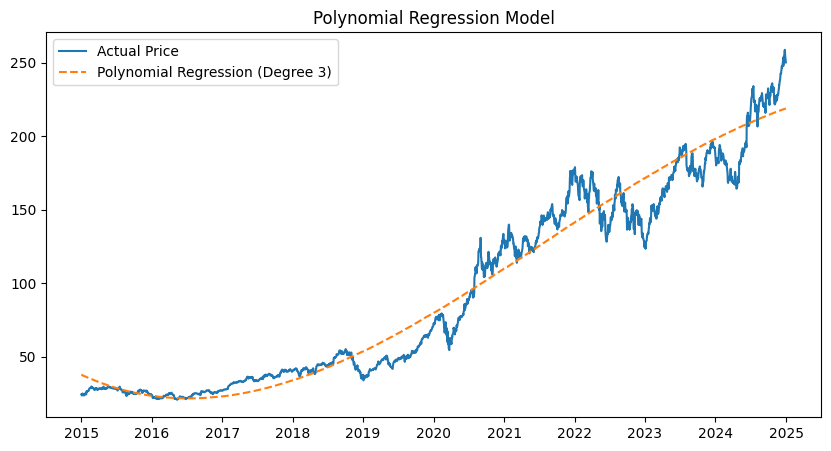

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Apply Polynomial Transformation (Degree = 2 or 3 for better fitting)
degree = 3  # Change this to experiment with different polynomial degrees
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train Polynomial Regression Model
poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)

# Predict future values
df['Poly_Pred'] = poly_lr.predict(poly.transform(X))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label="Actual Price")
plt.plot(df['Poly_Pred'], label=f"Polynomial Regression (Degree {degree})", linestyle="dashed")
plt.title("Polynomial Regression Model")
plt.legend()
plt.show()

**LSTM Model**

LSTM (Long Short-Term Memory) is useful for sequential data.

Preprocess Data for LSTM

In [21]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

# Create sequences
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Prepare LSTM input
seq_length = 50
X, y = create_sequences(df['Scaled_Close'].values, seq_length)

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


**Build and Train LSTM Model**

In [22]:
# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0271 - val_loss: 9.0738e-04
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.3881e-04 - val_loss: 0.0012
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7001e-04 - val_loss: 0.0020
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.6822e-04 - val_loss: 0.0013
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.2175e-04 - val_loss: 0.0026
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.7928e-04 - val_loss: 0.0012
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.5262e-04 - val_loss: 6.5060e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 2.5404e-04 - val_loss: 0.0013
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.4512e-04 - val_loss: 0.0012
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.1807e-04 - val_loss: 6.5579e-04


**Make Predictions**

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


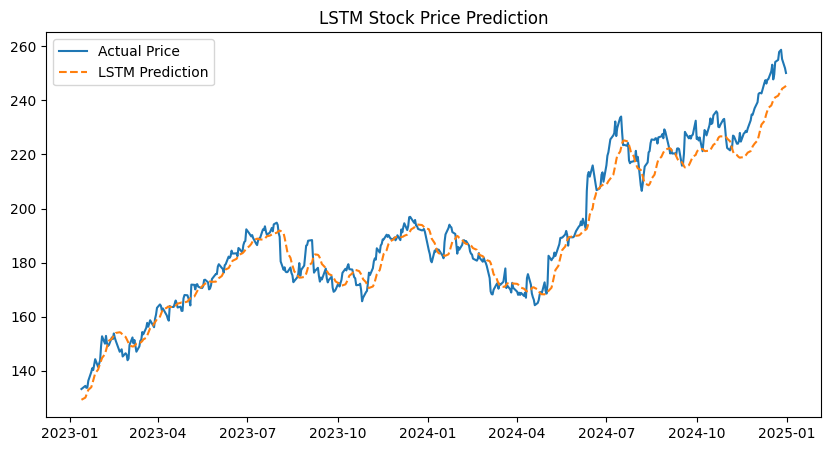

In [23]:
# Predict future prices
predictions = model.predict(X_test)

# Reverse scaling
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df.index[-len(y_test):], df['Close'].iloc[-len(y_test):], label="Actual Price")
plt.plot(df.index[-len(y_test):], predictions, label="LSTM Prediction", linestyle="dashed")
plt.title("LSTM Stock Price Prediction")
plt.legend()
plt.show()


**Performance metric**

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate performance metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2 Score: {r2:.4f}\n")

# ARIMA Model Performance
evaluate_model(df['Close'][d:], df['ARIMA_Pred'][d:], "ARIMA")

# Linear Regression Performance
evaluate_model(df['Close'], df['Linear_Pred'], "Linear Regression")

# Polynomial Regression Performance
evaluate_model(df['Close'], df['Poly_Pred'], f"Polynomial Regression (Degree {degree})")

# LSTM Model Performance
evaluate_model(df['Close'].iloc[-len(y_test):], predictions.flatten(), "LSTM")



ARIMA Performance:
MAE: 1.1887, MSE: 3.7155, RMSE: 1.9276, R^2 Score: 0.9991

Linear Regression Performance:
MAE: 17.9300, MSE: 484.0622, RMSE: 22.0014, R^2 Score: 0.8877

Polynomial Regression (Degree 3) Performance:
MAE: 10.8805, MSE: 197.9070, RMSE: 14.0679, R^2 Score: 0.9541

LSTM Performance:
MAE: 4.6599, MSE: 37.1658, RMSE: 6.0964, R^2 Score: 0.9501

